In [1]:
from gekko import brain
import struct
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle

###---------------------------------###############
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.losses import MeanSquaredError
from keras.optimizers import SGD, Adam
from livelossplot import PlotLossesKeras


Using TensorFlow backend.


In [2]:
# Get a list of data points that make up a circle
r = 1 # radius
theta = np.linspace(0,2*np.pi,101)
x = np.expand_dims(r*np.cos(theta), axis=1)
y = np.expand_dims(r*np.sin(theta), axis=1)
x_amb = np.expand_dims(np.cos(theta), axis=1)
y_amb = np.expand_dims(np.sin(theta), axis=1)
i = np.concatenate((x,y), axis=1)
o = np.concatenate((x_amb, y_amb), axis=1)
i.shape, o.shape
x.shape, y.shape, i.shape, o.shape

((101, 1), (101, 1), (101, 2), (101, 2))

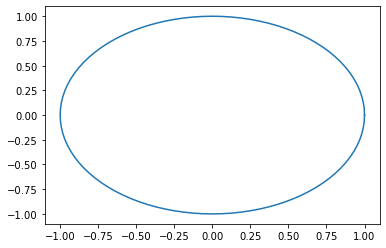

In [3]:
fig = plt.figure()
plt.plot(x, y)

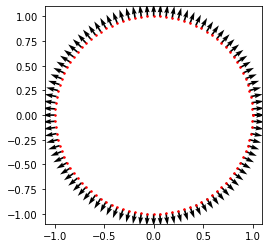

In [4]:
#PLOT the field nodes, the training set vectors and predicted vectors
#Initialize 3d figure
fig = plt.figure()
ax = fig.gca()
plt.plot(i[:,0], i[:,1], 'r.', markersize=3)
for ind, a in enumerate(i[:,0]):
    plt.quiver(i[ind,0], i[ind,1], o[ind,0], o[ind,1])
ax.set_aspect('equal', 'box')

In [5]:
# Fitting params
epochs=1000

# NN creation
model = Sequential()
# model.add(BatchNormalization())
model.add(Dense(1000, input_dim=2, activation = "tanh"))
# model.add(BatchNormalization())
# model.add(Dense(100, activation="tanh"))
# model.add(BatchNormalization())
# model.add(Dense(10, activation="sigmoid"))
# model.add(BatchNormalization())
model.add(Dense(2, activation="tanh"))
model.compile(loss=MeanSquaredError(), optimizer=SGD(lr=0.01, decay=1e-4/epochs), metrics=['accuracy'])

In [6]:
# Train the network
history = model.fit(i, o, epochs=epochs, batch_size=100, validation_split=0.2,\
                    )

Train on 80 samples, validate on 21 samples
Epoch 1/1000
80/80 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.1750 - val_loss: 0.5478 - val_accuracy: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 75us/step - loss: 0.4547 - accuracy: 0.2125 - val_loss: 0.5374 - val_accuracy: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 75us/step - loss: 0.4356 - accuracy: 0.2500 - val_loss: 0.5272 - val_accuracy: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 75us/step - loss: 0.4175 - accuracy: 0.3000 - val_loss: 0.5172 - val_accuracy: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 75us/step - loss: 0.4002 - accuracy: 0.3875 - val_loss: 0.5073 - val_accuracy: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 75us/step - loss: 0.3839 - accuracy: 0.5125 - val_loss: 0.4976 - val_accuracy: 0.0000e+00
Epoch 7/1000
80/80 [==============================] - 0s 75us/step - loss: 

Epoch 58/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0857 - accuracy: 0.8875 - val_loss: 0.1932 - val_accuracy: 1.0000
Epoch 59/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0840 - accuracy: 0.8875 - val_loss: 0.1901 - val_accuracy: 1.0000
Epoch 60/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0824 - accuracy: 0.8875 - val_loss: 0.1870 - val_accuracy: 1.0000
Epoch 61/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0809 - accuracy: 0.8875 - val_loss: 0.1840 - val_accuracy: 1.0000
Epoch 62/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0794 - accuracy: 0.9125 - val_loss: 0.1810 - val_accuracy: 1.0000
Epoch 63/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0779 - accuracy: 0.9125 - val_loss: 0.1781 - val_accuracy: 1.0000
Epoch 64/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0765 - accuracy: 0.9125 - val_loss: 0.1753 - val_accuracy

Epoch 115/1000
80/80 [==============================] - 0s 125us/step - loss: 0.0365 - accuracy: 0.9375 - val_loss: 0.0826 - val_accuracy: 1.0000
Epoch 116/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0361 - accuracy: 0.9375 - val_loss: 0.0814 - val_accuracy: 1.0000
Epoch 117/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0357 - accuracy: 0.9375 - val_loss: 0.0803 - val_accuracy: 1.0000
Epoch 118/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0352 - accuracy: 0.9375 - val_loss: 0.0792 - val_accuracy: 1.0000
Epoch 119/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0348 - accuracy: 0.9375 - val_loss: 0.0782 - val_accuracy: 1.0000
Epoch 120/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0345 - accuracy: 0.9375 - val_loss: 0.0771 - val_accuracy: 1.0000
Epoch 121/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0341 - accuracy: 0.9375 - val_loss: 0.0761 - val_a

Epoch 172/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0210 - accuracy: 0.9625 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 173/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0208 - accuracy: 0.9625 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 174/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0206 - accuracy: 0.9625 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 175/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0205 - accuracy: 0.9625 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 176/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0203 - accuracy: 0.9625 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 177/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0202 - accuracy: 0.9625 - val_loss: 0.0374 - val_accuracy: 1.0000
Epoch 178/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0200 - accuracy: 0.9625 - val_loss: 0.0370 - val_ac

Epoch 229/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0142 - accuracy: 0.9750 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 230/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0141 - accuracy: 0.9750 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 231/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0140 - accuracy: 0.9750 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 232/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0139 - accuracy: 0.9750 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 233/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0139 - accuracy: 0.9750 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 234/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0138 - accuracy: 0.9750 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 235/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0137 - accuracy: 0.9750 - val_loss: 0.0198 - val_ac

Epoch 286/1000
80/80 [==============================] - 0s 137us/step - loss: 0.0107 - accuracy: 0.9875 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 287/1000
80/80 [==============================] - 0s 134us/step - loss: 0.0107 - accuracy: 0.9875 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 288/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0106 - accuracy: 0.9875 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 289/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0106 - accuracy: 0.9875 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 290/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0105 - accuracy: 0.9875 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 291/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0105 - accuracy: 0.9875 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 292/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0105 - accuracy: 0.9875 - val_loss: 0.0119 - v

Epoch 343/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0088 - accuracy: 0.9875 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 344/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0088 - accuracy: 0.9875 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 345/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0087 - accuracy: 0.9875 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 346/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0087 - accuracy: 0.9875 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 347/1000
80/80 [==============================] - 0s 112us/step - loss: 0.0087 - accuracy: 0.9875 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 348/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0087 - accuracy: 0.9875 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 349/1000
80/80 [==============================] - 0s 112us/step - loss: 0.0086 - accuracy: 0.9875 - val_loss: 0.0083 - val_

Epoch 400/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 401/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 402/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 403/1000
80/80 [==============================] - 0s 137us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 404/1000
80/80 [==============================] - 0s 137us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 405/1000
80/80 [==============================] - 0s 125us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 406/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0067 - va

Epoch 457/1000
80/80 [==============================] - 0s 112us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 458/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 459/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 460/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 461/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 462/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 463/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0062 - val_

Epoch 514/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 515/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 516/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 517/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 518/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 519/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 520/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0061 - val_

Epoch 571/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 572/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 573/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 574/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 575/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 576/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 577/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0062 - val_ac

Epoch 628/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 629/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 630/1000
80/80 [==============================] - 0s 112us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 631/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 632/1000
80/80 [==============================] - 0s 175us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 633/1000
80/80 [==============================] - 0s 162us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 634/1000
80/80 [==============================] - 0s 137us/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0065 - 

Epoch 685/1000
80/80 [==============================] - 0s 150us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 686/1000
80/80 [==============================] - 0s 162us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 687/1000
80/80 [==============================] - 0s 137us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 688/1000
80/80 [==============================] - 0s 125us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 689/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 690/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 691/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0068 - 

Epoch 742/1000
80/80 [==============================] - 0s 125us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 743/1000
80/80 [==============================] - 0s 125us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 744/1000
80/80 [==============================] - 0s 112us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 745/1000
80/80 [==============================] - 0s 112us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 746/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 747/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 748/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0070 - v

Epoch 799/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 800/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 801/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 802/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 803/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 804/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 805/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_ac

Epoch 856/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 857/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 858/1000
80/80 [==============================] - 0s 62us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 859/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 860/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 861/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 862/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0075 - val_a

Epoch 913/1000
80/80 [==============================] - 0s 100us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 914/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 915/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 916/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 917/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 918/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 919/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0078 - val_a

Epoch 970/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 971/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 972/1000
80/80 [==============================] - 0s 87us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 973/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 974/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 975/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 976/1000
80/80 [==============================] - 0s 75us/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0079 - val_ac

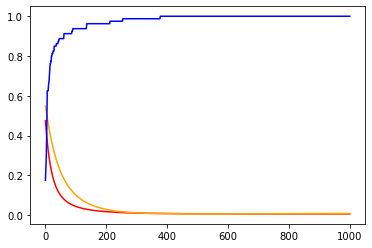

In [7]:
plt.plot(history.history['loss'], label='train', color='r')
plt.plot(history.history['val_loss'], color='orange')
plt.plot(history.history['accuracy'], color='b')

In [10]:
model.save("circle_model")

In [9]:
model = keras.load_model("circle_model")

NameError: name 'keras' is not defined

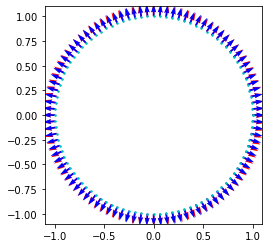

In [11]:
op = model.predict(i)
#PLOT the field nodes, the training set vectors and predicted vectors
#Initialize 3d figure
fig = plt.figure()
ax = fig.gca()
plt.plot(i[:,0], i[:,1], 'c.', markersize=3)
for ind, a in enumerate(i[:,0]):
    plt.quiver(i[ind,0], i[ind,1], op[ind,0], op[ind,1], color='r')
    plt.quiver(i[ind,0], i[ind,1], o[ind,0], o[ind,1], color='b')
ax.set_aspect('equal', 'box')

In [12]:
# Error between model and data
diff = (op - o)**2
diff

array([[1.69716096e-02, 3.61641440e-03],
       [1.66715568e-02, 1.39002393e-03],
       [1.57054002e-02, 2.17756040e-04],
       [1.41506274e-02, 3.78700460e-05],
       [1.21315856e-02, 5.91243976e-04],
       [9.81103660e-03, 1.50848573e-03],
       [7.37815548e-03, 2.41381396e-03],
       [5.03398223e-03, 3.01432218e-03],
       [2.97455369e-03, 3.15357137e-03],
       [1.37230118e-03, 2.82347866e-03],
       [3.57402617e-04, 2.14125532e-03],
       [3.80362693e-07, 1.30534773e-03],
       [2.98313348e-04, 5.44783758e-04],
       [1.16732769e-03, 7.35012425e-05],
       [2.44429286e-03, 5.63877575e-05],
       [3.90046945e-03, 5.89214694e-04],
       [5.26856404e-03, 1.69183913e-03],
       [6.28275620e-03, 3.31213060e-03],
       [6.72733516e-03, 5.33751539e-03],
       [6.48581205e-03, 7.61106316e-03],
       [5.57853711e-03, 9.94991156e-03],
       [4.17514625e-03, 1.21636179e-02],
       [2.57227090e-03, 1.40714117e-02],
       [1.13435900e-03, 1.55171331e-02],
       [2.083929